
# Goal
The goal in this competition is to take an image of a handwritten single digit, and determine what that digit is.
For every in the test set, you should predict the correct label.
# Metric
This competition is evaluated on the categorization accuracy of your predictions (the percentage of images you get correct).

# Submission File Format
The file should contain a header and have the following format:

ImageId,Label
* 1,0
* 2,0
* 3,0
* etc.


<a id="数据集"></a> <br>
# 数据集概览
* 在本教程中，我们将使用“手语数字数据集”。
* 该数据集中包含2062张手语数字图片。
* 数字范围是从0到9。因此共有10个不同的手势。
* 为了简化起见，我们仅使用手势0和1。
* 准备我们的X和Y数组。X是图像数组（手势零和一手势），Y是标签数组（0和1）。

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import warnings
# filter warnings
warnings.filterwarnings('ignore')

In [2]:
# 先用pandas读入csv
from sklearn.model_selection import train_test_split
df = pd.read_csv('train.csv')
Y = df.iloc[:, 0].values   # 标签数据
X = df.iloc[:, 1:].values  # 特征数据
np.save("X.npy", X)
np.save("Y.npy", Y)
X_train = np.load('X.npy')
Y_train = np.load('Y.npy')

# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

print("数据形状:", X_train.shape) 
print("数据形状:", Y_train.shape) 
print("数据形状:", X_test.shape) 
print("数据形状:", Y_test.shape) 



数据形状: (42000, 784)
数据形状: (42000,)


NameError: name 'X_test' is not defined

数据形状: (42000, 784)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
数据形状: (42000,)
[1 0 1 4 0 0 7 3 5 3]


(-0.5, 27.5, 27.5, -0.5)

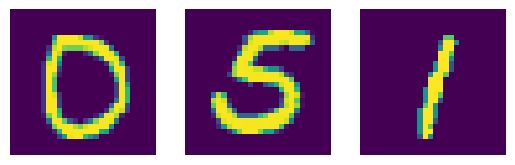

In [5]:
# load data set
img_size = 28
dataX = np.load('X.npy') # 查看数据形状
print("数据形状:", dataX.shape) # 打印前五行数据 
print(dataX[:10])
dataY = np.load('Y.npy') # 查看数据形状
print("数据形状:", dataY.shape) # 打印前五行数据

print(dataY[:10])

plt.subplot(1, 3, 1)
plt.imshow(dataX[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(dataX[900].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(dataX[1500].reshape(img_size, img_size))
plt.axis('off')

* 为手势零的图像创建标签数组，其值为0，为一手势的图像创建标签数组，其值为1

In [6]:
Y_test = Y_test.reshape(-1, 1)
Y_train = Y_train.reshape(-1, 1)
print("Y_test shape: ", Y_test.shape)
print("Y_train shape: ", Y_train.shape)
print("X_shape: " , X.shape)
print("Y_shape: " , Y.shape)
print("X_test shape: " , X_test.shape)
print("Y_test shape: " , Y_test.shape)

Y_test shape:  (42000, 1)
Y_train shape:  (42000, 1)
X_shape:  (42000, 784)
Y_shape:  (42000,)
X_test shape:  (42000, 784)
Y_test shape:  (42000, 1)


In [7]:
# sample_size = 5000 # 选择较小的样本数量
# sample_size = min(5000, X_test.shape[0])
# indices = np.random.choice(X_test.shape[0], sample_size, replace=False)
# X = X[indices]
# Y = Y[indices]
# X_test = X_test[indices]
# Y_test = Y_test[indices]


In [8]:
# Then lets create x_train, y_train, x_test, y_test arrays
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]
print("X_train number: " , number_of_train)
print("X_test number: " , number_of_test)

X_train number:  35700
X_test number:  6300


* 为方便后续矩阵乘法的计算，对样本矩阵进行转置

In [9]:
y_train = Y_train.T
y_test = Y_test.T
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (35700, 784)
x test:  (6300, 784)
y train:  (35700,)
y test:  (6300,)


# OneHot+归一化

In [10]:
from sklearn.preprocessing import OneHotEncoder

# 初始化OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# 进行one-hot编码
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.reshape(-1, 1))

print("y_train_encoded shape:", y_train_encoded.shape)
print("y_test_encoded shape:", y_test_encoded.shape)


from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# x_train_scaled = scaler.fit_transform(x_train.T).T
# x_test_scaled = scaler.transform(x_test.T).T

y_test = y_test_encoded
y_train = y_train_encoded
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# 转置数据，使其每行代表一个样本
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]
X_train = X_train.T.reshape(number_of_train, 28, 28, 1)
X_test = X_test.T.reshape(number_of_test, 28, 28, 1)

# 确保数据类型为 float32 并归一化
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


y_train_encoded shape: (35700, 10)
y_test_encoded shape: (6300, 10)
y_train shape: (35700, 10)
y_test shape: (6300, 10)
X_train shape: (35700, 28, 28, 1)
X_test shape: (6300, 28, 28, 1)


<!-- <a id="10"></a> <br>
# 深度神经网络(DNN)
* 2-layer 感知机: 
    * 神经网络结构： 包括输入层、一个或多个隐藏层以及输出层。
    * 激活函数： 激活函数提供了非线性变换，使模型具备拟合复杂数据的能力。tanh激活函数比sigmoid更适合用于隐藏单元，因为它的输出均值更接近于零，从而更好地中心化数据以供下一层使用。

<a href="http://ibb.co/eF315x"><img src="http://preview.ibb.co/dajVyH/9.jpg" alt="9" border="0"></a>

   
    
     -->

# 简单的全连接网络

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    Flatten(input_shape=(28, 28, 1)),  # 展平层将 28x28 图像转换为一维
    Dense(64, activation='relu'),     # 第一层
    Dense(32, activation='relu'),     # 第二层
    Dense(10, activation='softmax')   # 输出层
])

# 编译模型
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 打印模型结构
model.summary()

# 训练模型
history = model.fit(X_train, y_train_encoded, epochs=50, batch_size=32, validation_split=0.2)



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,650 (205.66 KB)

 Trainable params: 52,650 (205.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
893/893 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1017 - loss: 2.3142 - val_accuracy: 0.1105 - val_loss: 2.3020
Epoch 2/50
893/893 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1178 - loss: 2.2972 - val_accuracy: 0.1085 - val_loss: 2.3037
Epoch 3/50
893/893 ━━━━━━━━━━━━━━━━━━━━ 1s 962us/step - accuracy: 0.1416 - loss: 2.2782 - val_accuracy: 0.1035 - val_loss: 2.3157
Epoch 4/50
893/893 ━━━━━━━━━━━━━━━━━━━━ 1s 976us/step - accuracy: 0.1679 - loss: 2.2339 - val_accuracy: 0.0992 - val_loss: 2.3363
Epoch 5/50
893/893 ━━━━━━━━━━━━━━━━━━━━ 1s 963us/step - accuracy: 0.2022 - loss: 2.1595 - val_accuracy: 0.1015 - val_loss: 2.3760
Epoch 6/50
893/893 ━━━━━━━━━━━━━━━━━━━━ 1s 941us/step - accuracy: 0.2388 - loss: 2.0773 - val_accuracy: 0.1008 - val_loss: 2.4355
Epoch 7/50
893/893 ━━━━━━━━━━━━━━━━━━━━ 1s 984us/step - accuracy: 0.2690 - loss: 1.9934 - val_accuracy: 0.1011 - val_loss: 2.5342
Epoch 8/50
893/893 ━━━━━━━━━━━━━━━━━━━━ 1s 941us/step - accuracy: 0.2978 - loss: 1.9151 - val_